## Financial Mathematics

# Question 1

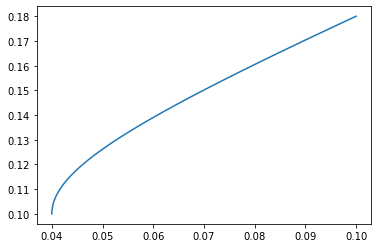

In [12]:
import matplotlib.pyplot as plt
sig2 = lambda r: (1/400)*np.sqrt(210000*(r**2)-42000*r+2356)
rbar = lambda l: 0.18-0.08*l
X = rbar(np.linspace(0,1,100))
Y = sig2(X)

plt.plot(Y,X)
plt.show()

# Question 4(b)

In [13]:
#import datetime
import numpy as np
from pandas_datareader import data
from scipy.stats import norm

"""
Variance-Covariance calculation of daily Value-at-Risk
using confidence level c, with mean of returns mu
and standard deviation of returns sigma, on a portfolio
of value investiment P.
"""
def var_cov_var(P, c, mu, sigma):
    alpha = norm.ppf(1-c, mu, sigma)
    return P - P*(alpha + 1)

if __name__ == "__main__":

    netflix = data.DataReader(['NFLX'], 'yahoo', start='2018/01/01', end='2022/01/01')
    netflix["rets"] = netflix["Adj Close"].pct_change()

    P = 1e3   # 1,000 USD
    c = 0.95  # 95% confidence interval
    mu = np.mean(netflix["rets"])
    sigma = np.std(netflix["rets"])
    var = sigma**2
    VaR = var_cov_var(P, c, mu, sigma)
    print ("mean: $%0.5f" % mu)
    print ("Variance: $%0.5f" % var)
    print ("Value-at-Risk: $%0.2f" % VaR)

mean: $0.00141
Variance: $0.00064
Value-at-Risk: $40.29
